In [1]:
push!(LOAD_PATH,pwd())
using ProfileView
using constants
using types10
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [2]:
Eoff=5.0
Ts=collect(300.0:10.0:900.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-1.8e20]#,-1.22e18,-1.02e18,-0.94e18]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
numofnn=[1e18]#,1e18,1e18,1e18]
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.0]#,0.8,0.7,0.61]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1(var)=0.0#EX1(var0)
alphaX3(var)=0.0#EX1(var0)
alphaLH(var)=0.0#EX3(var0)
alphaHH(var)=0.0#EX3(var0)

function Da(band::parBandTx,x::Float64)
    Da=7.0#9.0-1.5*x*x
    Dv=1.0
    if band==bandX3 ||  band==bandX1
        return Da
    end
    if band==bandHH ||  band==bandLH
        return Dv
    end
end

bandX3=parBandTx(true,1.0,effMassX3(var0),alphaX3(0.0),EX3(var0),[EX3],[effMassX3],[alphaX3],var0)
bandX1=parBandTx(true,1.0,effMassX1(var0),alphaX1(0.0),EX1(var0),[EX1],[effMassX1],[alphaX1],var0)
bandHH=parBandTx(true,1.0,effMassHH(var0),alphaHH(0.0),EHH(var0),[EHH],[effMassHH],[alphaHH],var0)
bandLH=parBandTx(true,1.0,effMassLH(var0),alphaLH(0.0),ELH(var0),[ELH],[effMassLH],[alphaLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#
#bndstTx=BandStrucTx([bandX3,bandX3,bandX3],var0)#

#vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
vartau0=[bandX3.effMass,Ts[1],EX1(var0),xs[1],EX1(var0),bandX3,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandLH]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
#tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauAC(var)=tauAC_func(Cl(var[4]),Da(var[6],var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauPOP3(var)=tauPOP3_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(epsilon0_x(var[4]),var[1],var[9])
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI,tauPOP3],vartau0)#,tauII2,tauPOP2,tauPOP3

xmax=3.0

3.0

In [3]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis,sigmaes,sigmahs,seebeckes,seebeckhs)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 19.782285 seconds (115.92 M allocations: 17.468 GiB, 10.19% gc time)


3.0

In [4]:
foreach(x->println(x," ", kees[x,1,1]),1:length(sigmaes[:,:,1]))

1 1.397757465105308
2 1.4215498537849636
3 1.444813896940936
4 1.4666390715911422
5 1.4876875115953903
6 1.5079739234012
7 1.527903026942627
8 1.5465580388355864
9 1.5645802642129643
10 1.5819796383148748
11 1.5993149193267082
12 1.6152618661732676
13 1.6307674164574317
14 1.645799466118922
15 1.6603717848855677
16 1.6745053885436714
17 1.6885174235224412
18 1.701595283019186
19 1.714351687162743
20 1.726775844271708
21 1.7388740050419769
22 1.7506563691946093
23 1.7625944484433496
24 1.7734242571201286
25 1.784102986541462
26 1.7945525098312005
27 1.8047606366471205
28 1.8147265130665078
29 1.824452699099654
30 1.83394272978708
31 1.8437506359774274
32 1.8522909369185112
33 1.8608661722222342
34 1.8692771080638166
35 1.8774988823312977
36 1.885522987652357
37 1.8933463887386326
38 1.9009685690722646
39 1.9083887096514422
40 1.915607323947098
41 1.922626169362191
42 1.929513999205736
43 1.9358801620776322
44 1.9421366779430707
45 1.948233088272349
46 1.95415681821743
47 1.9599065371878

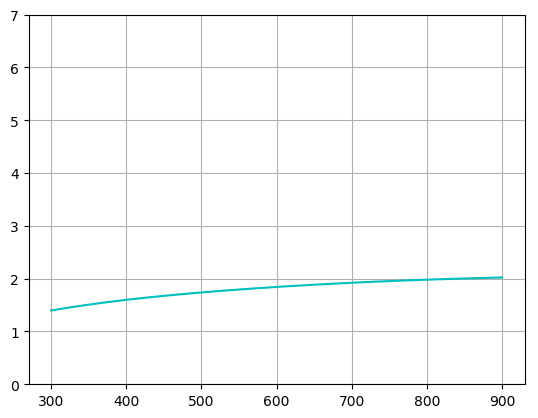

In [5]:
plot(Ts,kees[:,1,1],linestyle="-",color="c")
ylim(0,7)
grid()

In [6]:
foreach(x->println(x," ", kbis[x,1,1]),1:length(sigmaes[:,:,1]))

1 1.578131116848219e-12
2 5.180065114584989e-12
3 1.5898288261479196e-11
4 4.4748753644106076e-11
5 1.1978575423548568e-10
6 3.0422090205241396e-10
7 7.34911622857612e-10
8 1.6751469857507312e-9
9 3.686174646442068e-9
10 7.992233653302789e-9
11 1.5917841864726013e-8
12 3.11780034629776e-8
13 5.951712803685795e-8
14 1.1184966410070644e-7
15 1.9861203540541684e-7
16 3.4752461058587816e-7
17 5.964010738244745e-7
18 1.0081547667002432e-6
19 1.6380085294982622e-6
20 2.6293926308536478e-6
21 4.157860947170812e-6
22 6.481196758072052e-6
23 9.822387127939763e-6
24 1.4739908414681386e-5
25 2.1857946263381316e-5
26 3.197766597157317e-5
27 4.584912947356589e-5
28 6.520833041315323e-5
29 9.185702062956662e-5
30 0.0001277596716345124
31 0.00017514583320725382
32 0.00023850894445568338
33 0.00032225441920524035
34 0.0004302343003079252
35 0.0005685045610096259
36 0.0007470456333894859
37 0.0009752733178032562
38 0.0012590543130260746
39 0.001613636446275957
40 0.002058445222999849
41 0.0026114927950

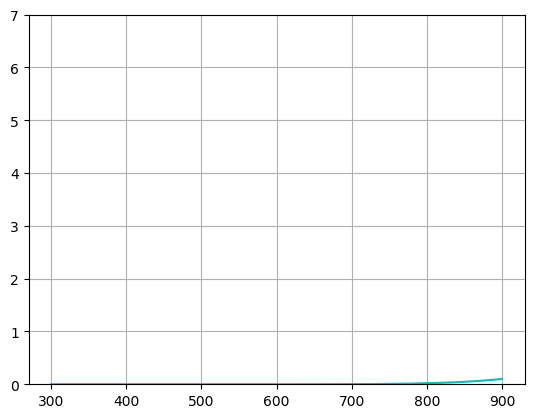

In [7]:
plot(Ts,kbis[:,1,1],linestyle="-",color="c")
ylim(0,7)
grid()

In [8]:
foreach(x->println(x," ", seebecks[x,1,1], "   es ",seebeckes[x,1,1],"   hs ",seebeckhs[x,1,1]),1:length(sigmaes[:,:,1]))

1 -7.95229407359666e-5   es -7.952294073597508e-5   hs 0.0029338646917967354
2 -8.168386790669455e-5   es -8.168386790672275e-5   hs 0.0028329944886267863
3 -8.381544711390292e-5   es -8.381544711399055e-5   hs 0.0027380645003440805
4 -8.591767852233966e-5   es -8.591767852258919e-5   hs 0.002651666329408258
5 -8.799097198123503e-5   es -8.799097198191119e-5   hs 0.002568217822217344
6 -9.003602369727781e-5   es -9.003602369901617e-5   hs 0.0024891835728585126
7 -9.205367011034266e-5   es -9.205367011459306e-5   hs 0.002414679699481079
8 -9.404477286778021e-5   es -9.404477287757811e-5   hs 0.002345951801201012
9 -9.60101507158256e-5   es -9.60101507376433e-5   hs 0.002279140164590773
10 -9.795055267776169e-5   es -9.795055272571375e-5   hs 0.002211524134907344
11 -9.98666589916007e-5   es -9.98666590880493e-5   hs 0.002155547509707522
12 -0.00010175909626884921   es -0.00010175909645985863   hs 0.002099448222210451
13 -0.00010362845678572555   es -0.00010362845715459886   hs 0.0020446

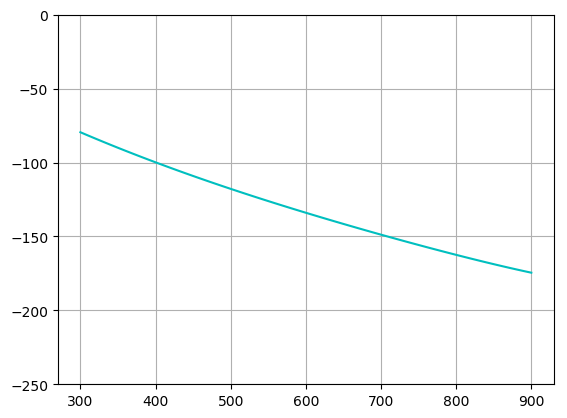

In [9]:
plot(Ts,seebecks[:,1,1]*1e6,linestyle="-",color="c")
ylim(-250,-0)
grid()

In [10]:
foreach(x->println(x," ", sigmas[x,1,1], "   es ",sigmaes[x,1,1],"   hs ",sigmahs[x,1,1]),1:length(sigmaes[:,:,1]))

1 205808.49960350792   es 205808.49960350734   hs 5.793110672054667e-10
2 203332.08391047321   es 203332.08391047124   hs 1.9669451664424433e-9
3 200898.2480677469   es 200898.24806774067   hs 6.2391197602043546e-9
4 198508.75924586982   es 198508.75924585172   hs 1.8093896153802684e-8
5 196163.45305555608   es 196163.45305550614   hs 4.9934629773238346e-8
6 193861.01772305698   es 193861.01772292634   hs 1.3066051501745274e-7
7 191599.7227695404   es 191599.72276921553   hs 3.2487502834339986e-7
8 189377.90183024333   es 189377.90182948287   hs 7.604536749973344e-7
9 187194.18171053063   es 187194.18170881108   hs 1.719531402190651e-6
10 185047.52733751413   es 185047.52733367195   hs 3.8421750874156875e-6
11 182937.1842690267   es 182937.18426120374   hs 7.822968577081292e-6
12 180862.58307062776   es 180862.58305493344   hs 1.5694321612928396e-5
13 178823.2455590193   es 178823.24552831426   hs 3.070504725397775e-5
14 176818.7120758262   es 176818.7120165801   hs 5.924608951702453e-

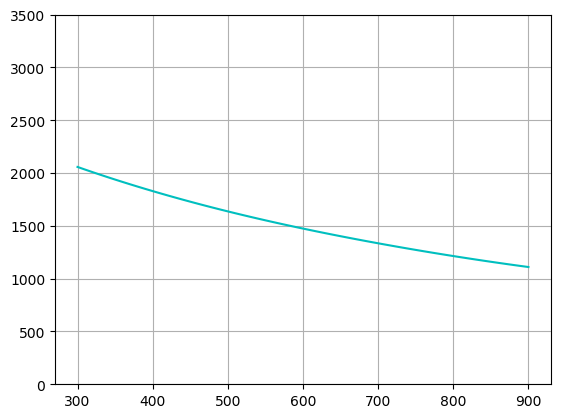

In [11]:
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="c")
ylim(0,3500)
grid()

In [12]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(undef,length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(undef,length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-EX3(0.0)
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
#foreach(i->println("$i= ",Ts[i]),1:length(Ts))
#Efsr

In [13]:
foreach(x->println(x," EX3 ", Efsr[x,1,1]," EX1 ", Efsr[x,1,1]-Ec0(0.6)),1:length(Efsr[:,:,1]))

1 EX3 0.1430999671773634 EX1 0.08209996717736337
2 EX3 0.14280935998684452 EX1 0.0818093599868445
3 EX3 0.14250775435061502 EX1 0.081507754350615
4 EX3 0.14219587373682785 EX1 0.08119587373682782
5 EX3 0.14187370034736357 EX1 0.08087370034736355
6 EX3 0.14154075079045203 EX1 0.080540750790452
7 EX3 0.14119636119200152 EX1 0.08019636119200149
8 EX3 0.1408398913544886 EX1 0.07983989135448857
9 EX3 0.14047083171782848 EX1 0.07947083171782846
10 EX3 0.14008883314545262 EX1 0.07908883314545259
11 EX3 0.13969368938082916 EX1 0.07869368938082913
12 EX3 0.13928529832973968 EX1 0.07828529832973966
13 EX3 0.1388636200525708 EX1 0.07786362005257078
14 EX3 0.13842864124539123 EX1 0.0774286412453912
15 EX3 0.13798034992173225 EX1 0.07698034992173222
16 EX3 0.13751872026070355 EX1 0.07651872026070353
17 EX3 0.13704370573731062 EX1 0.07604370573731059
18 EX3 0.13655523808278325 EX1 0.07555523808278322
19 EX3 0.13605322978171586 EX1 0.07505322978171583
20 EX3 0.13553757829383262 EX1 0.0745375782938325

In [14]:
#println("-1")
#############Lattice Thermal Conductivity Parameters###############
con=0.0
thetaL=52.3e12*hbar/kB # K 
thetaT=29.7e12*hbar/kB  # K
vL=(1-con)*7700+con*4900    # m/s
vT=(1-con)*4900+con*3000    # m/s
gammaL=2.5*(1-con)+1.7*con
gammaT=2.5*(1-con)+1.7*con
M=(2*(24.305e-3)+(28.0855e-3*(1-con)+118.71e-3*con))/3/Nav
V=((1-con)*(6.39e-10)^3+con*(6.77e-10)^3)/12
a=V^(1.0/3.0)
ro=M/V
Vdj=(((6.39e-10)^3)/((1-con)*(6.39e-10)^3+con*(6.77e-10)^3))^(1/3)
jL=vL/7700*Vdj
jT=vT/4900*Vdj
thetaLx=thetaL*jL
thetaTx=thetaT*jT
##########Boundary Scattering###############3
D=11e-9
p=1.0
##########Alloy Scattering###################
mbar=(28.0855*(1-con)+118.71*con)
GammaSiSn=(1-con)*((28.0855-mbar)/mbar)^2+con*((118.71-mbar)/mbar)^2
GammaMgSiSn=2*((mbar/(24.305+mbar))^2*GammaSiSn);         
##########Electron Scattering###################
Eep=5.0*q
xsp=xs[1]
Tp=300.0
mdx1=0.67*me
mdx3=0.38*me
Efx3=0.2589
Efx1=0.2589
##########Nanoparticle Scattering###################
NP=0
#alpha=1.0
Rnp=1/2*15.0e-9#
Vnp=4/3*pi*(Rnp)^3
rhonp=NP/100/Vnp
rhoM=3.0
rhoT=3.78
alphaNP=0.2289#1-exp(-1*(rhoT-rhoM)/rhoM);

#vartauPH0=[[0.02],Ts[1],gammaL,gammaT,xsp,thetaCLx,thetaCTx,thetaCTx,MSi,MGe,VSi,a,T_EF_Dict,0.0]
Tsindex=1#25
numberofnindex=1
xsindex=1
vartauPH0=[ [0.02],  Ts[1],   gammaL,  gammaT, con,#5
    thetaLx, thetaTx, thetaTx, M,   M, #10
    V, a, T_EF_Dict_Array, Eep, alphaNP, #15
    Rnp, thetaLx, thetaTx, vL, vT, #20
    vL, vT, p, NP,Tsindex,#25
    numberofnindex,xsindex,p,D,GammaMgSiSn,#30
    mdx1,mdx3,Efx1,Efx3,ro,#35,
    NP,alphaNP,Rnp,Vnp,rhonp #40
    ]
thetaCLx=thetaCL(vartauPH0[12],vartauPH0[5],vartauPH0[17],vartauPH0[19],vartauPH0[11])
thetaCTx=thetaCT(vartauPH0[12],vartauPH0[5],vartauPH0[18],vartauPH0[19],vartauPH0[11])
#println("2")
tauPHNLf(var)=tauPH_NL(var[3],var[11],var[1],var[2],var[9],var[21])
tauPHNTf(var)=tauPH_NT(var[4],var[11],var[1],var[2],var[9],var[22])                  


tauPHULf(var)=tauPH_U(var[3],var[1],var[2],var[9],var[19],var[17])
tauPHUTf(var)=tauPH_U(var[4],var[1],var[2],var[9],var[20],var[18])

tauPHALLLf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[19])
tauPHALLTf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[20])

tauPHeLfX3(var)=tauPH_e(var[14],mdx3,var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[21])
tauPHeTfX3(var)=tauPH_e(var[14],mdx3,var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[22])

tauPHeLfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
    ,var[1],var[2],var[21])
tauPHeTfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
    ,var[1],var[2],var[22])

tauPHBLf(var)=tauPH_B(var[19],var[28],var[29])
tauPHBTf(var)=tauPH_B(var[20],var[28],var[29])
#println("3")

tauPHNPLf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[19])
tauPHNPTf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[20])

tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0)#,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPH_eLf ,tauPHALLLf ,tauPHBLf,,tauPHULf
tauPHNL=tau_phonon_B([tauPHNLf],vartauPH0)
tauPHRL=tau_phonon_B([tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0) #,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPHALLLf,tauPH_eLf] ,tauPHBLf


tauPHTOTTx=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
tauPHNTx=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTx=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
#

tauPHTOTTy=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf tauPHBTf
tauPHNTy=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTy=tau_phonon_B([tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPH_eTf ,tauPHBTf,tauPHALLTf,tauPHeTf
#println("4")

tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]
xmax=1.0

1.0

In [15]:
rhonp

0.0

In [16]:
kls=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)
    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vL,vT,vT])
    println("T=", iTx, " kl= " ,round(kls[iT,1,1]*10000)/10000)
    println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,
    " kTx/3=",kTx," kTy/3=",kTy)
end

T=300.0 kl= 9.0975
IL1= 7.680961977638855e-13 IL2= 0.6079309978702118 IL3= 1.2754371070915073e11 ITx1= 5.5156807082497574e-14 ITx2= 0.12729866379511612 ITx3= 4.547778853694183e10 kL/3=6.724985437016552 kTx/3=1.1862416667750355 kTy/3=1.1862416667750355
T=310.0 kl= 8.7216
IL1= 6.431696705611712e-13 IL2= 0.5585352835277401 IL3= 1.2282562896207924e11 ITx1= 4.5838830186836315e-14 ITx2= 0.11619420887413144 ITx3= 4.322616715814772e10 kL/3=6.4430287458137405 kTx/3=1.1392979183257594 kTy/3=1.1392979183257594
T=320.0 kl= 8.3734
IL1= 5.4126700329482e-13 IL2= 0.5142282703094428 IL3= 1.182980960284511e11 ITx1= 3.829917712497111e-14 ITx2= 0.10632823688645426 ITx3= 4.112822813824661e10 kL/3=6.181858909719275 kTx/3=1.09575172750538 kTy/3=1.09575172750538
T=330.0 kl= 8.0499
IL1= 4.576662829669556e-13 IL2= 0.47438417668745453 IL3= 1.1395968271597963e11 ITx1= 3.216155310227562e-14 ITx2= 0.09753471919199946 ITx3= 3.917139179647018e10 kL/3=5.9393601253060995 kTx/3=1.0552607478363074 kTy/3=1.055260747836307

T=630.0 kl= 3.6156
IL1= 1.195023159380486e-14 IL2= 0.07924818819353975 IL3= 4.3960747437913895e10 ITx1= 7.524607253718007e-16 ITx2= 0.01508580475466828 ITx3= 1.2856367881922625e10 kL/3=2.6301855902532396 kTx/3=0.49269310403178124 kTy/3=0.49269310403178124
T=640.0 kl= 3.5484
IL1= 1.0908811384171658e-14 IL2= 0.07574309247544986 IL3= 4.2824604877070366e10 ITx1= 6.856857884004354e-16 ITx2= 0.014402988051058014 ITx3= 1.2492667060136753e10 kL/3=2.580437845413907 kTx/3=0.48397156142593895 kTy/3=0.48397156142593895
T=650.0 kl= 3.4836
IL1= 9.971369695659648e-15 IL2= 0.07243993218091825 IL3= 4.173054093715727e10 ITx1= 6.257084132751145e-16 ITx2= 0.01376059508939038 ITx3= 1.2144026497049345e10 kL/3=2.5324748816078633 kTx/3=0.47554986701305896 kTy/3=0.47554986701305896
T=660.0 kl= 3.421
IL1= 9.126246357873528e-15 IL2= 0.06932448711314619 IL3= 4.067658796777336e10 ITx1= 5.717507103724673e-16 ITx2= 0.013155689857578161 ITx3= 1.1809635847922375e10 kL/3=2.4862050824345454 kTx/3=0.4674129847035205 kTy/

In [32]:
MgSi_KL_T=[321.90992834086, 371.754752267254,421.943598620983,471.00705245976 ,521.547698343569,622.625330298128,672.789015437092,
722.569792634992,772.346910019836]
MgSi_KL_K=[8.12807881773399,6.66995073891626,5.80295566502463,5.17241379310345,4.72906403940887,4.22660098522167,3.92118226600985,
3.59605911330049,3.51724137931034]

9-element Array{Float64,1}:
 8.12807881773399
 6.66995073891626
 5.80295566502463
 5.17241379310345
 4.72906403940887
 4.22660098522167
 3.92118226600985
 3.59605911330049
 3.51724137931034

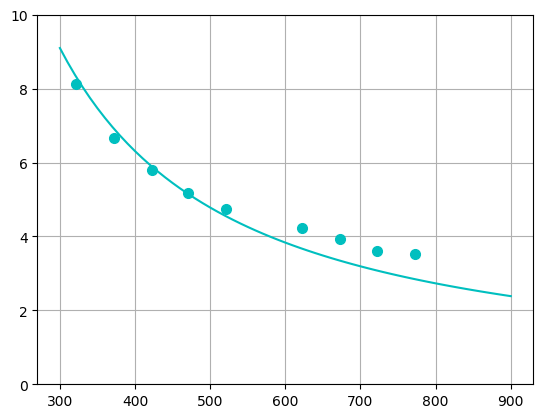

In [34]:
figure()
plot(Ts,kls[:,1,1],linestyle="-",color="c")
plot(MgSi_KL_T,MgSi_KL_K,linestyle="None",marker="o",markersize=7,color="c")
ylim(0,10)

grid()

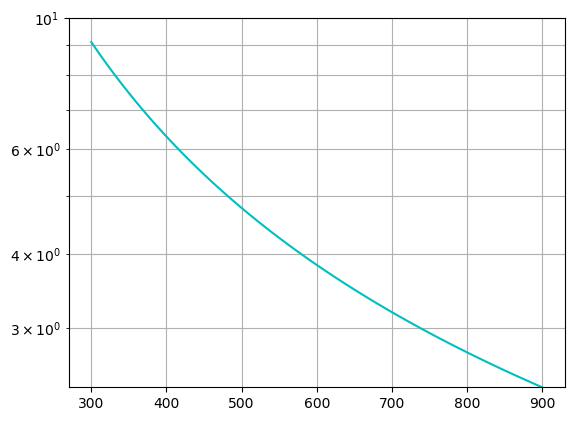

In [17]:
semilogy(Ts,kls[:,1,1],linestyle="-",color="c")
ylim(0,10)

grid(true,which="both")


In [18]:
tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]

3-element Array{tau_phonon_B,1}:
 tau_phonon_B(Function[tauPHNTf, tauPHUTf, tauPHALLTf, tauPHeTfX3, tauPHeTfX1, tauPHBTf, tauPHNPTf], Any[[0.000100364, 0.000101917, 0.000104712, 0.000108749, 0.000114028, 0.000120549, 0.000128312, 0.000137317, 0.000147563, 0.000159052  …  0.252003, 0.252014, 0.252024, 0.252033, 0.252041, 0.252048, 0.252053, 0.252057, 0.25206, 0.252061], 900.0, 2.5, 2.5, 0.0, 399.48, 226.856, 226.856, 4.2452e-26, 4.2452e-26  …  6.10329e-31, 3.46157e-31, 0.2589, 0.2589, 1952.43, 0, 0.2289, 7.5e-9, 1.76715e-24, 0.0])
 tau_phonon_B(Function[tauPHNTf], Any[[0.000100364, 0.000101917, 0.000104712, 0.000108749, 0.000114028, 0.000120549, 0.000128312, 0.000137317, 0.000147563, 0.000159052  …  0.252003, 0.252014, 0.252024, 0.252033, 0.252041, 0.252048, 0.252053, 0.252057, 0.25206, 0.252061], 900.0, 2.5, 2.5, 0.0, 399.48, 226.856, 226.856, 4.2452e-26, 4.2452e-26  …  6.10329e-31, 3.46157e-31, 0.2589, 0.2589, 1952.43, 0, 0.2289, 7.5e-9, 1.76715e-24, 0.0])                             

In [19]:
klscomp=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
klscomp=thermalPropsiso(Ts,tauPHL,tauPHTx,tauPHTy,[vL,vT,vT])

61×1×1 Array{Float64,3}:
[:, :, 1] =
 9.097468770566623 
 8.721624582465259 
 8.373362364730037 
 8.049881620978715 
 7.748742276809143 
 7.467808175815423 
 7.205200869261486 
 6.959261821193118 
 6.72852131406864  
 6.511672642710607 
 6.307550499482509 
 6.1151127201430375
 5.933424763200056 
 ⋮                 
 2.7706569863107826
 2.7305405319984284
 2.691548305393095 
 2.653634366590468 
 2.6167551937373146
 2.580869526599223 
 2.5459382218423916
 2.5119241190311374
 2.4787919164395853
 2.446508055862411 
 2.415040615687213 
 2.384359211560803 

In [20]:
xxsp=0.6
xsp=(100-xxsp)/100
Eep=7.0
etha=0.96
thetaD=350.0#524.0
#gammaSA,GM,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha

Tt=thetaD
gammaSA=2.02
beta=2.0

eps=39
deltaSi=6.39e-10
deltaGe=6.77e-10
delta=deltaSi*(1-xsp)+deltaGe*xsp
deltacgs=delta*100
V=((1-xsp)*(6.39e-10)^3+xsp*(6.77e-10)^3)/12
MSiGecgs(xsp)=(2*(24.305)+(28.0855*(1-xsp)+118.71*xsp))/3
#G=1.033*(1-xsp)+1.017*xsp

a3=((1-xsp)*(6.39e-10)^3+xsp*(6.77e-10)^3)/12
a1=a3^(1/3)
#vtt=kB/hbar*(6*pi*pi)^(-1/3)*thetaD*delta
dd=(4.66e-26*(1-xsp)+1.206e-25*xsp)/(2e-29*(1-xsp)+2.2636e-29*xsp)

delMSiGe=(2*(24.305)+(28.0855*(1-xsp)-118.71*xsp))/3
deldelta=deltaSi-deltaGe
mbar=(28.0855*(1-xsp)+118.71*xsp)
GM=(1-xsp)*((28.0855-mbar)/mbar)^2+xsp*((118.71-mbar)/mbar)^2

omegaD=thetaD*kB/hbar
mds=0.5*me#0.427*me
#vt=5880.0

4.55469178e-31

In [21]:
function tauPH_U_SAT(gamma::Float64,intx::Array{Float64},T::Float64,M::Float64,
    theta::Float64,omegaD::Float64,beta::Float64,delta::Float64)
    #intx is different from x in oither phonon calculations intx=omega/omegaD
    Mcgs=M
    #println("Mcgs= ",Mcgs)
    deltacgs=delta*100
    #println("deltacgs= ",deltacgs)
    #println("1/Mcgs/deltacgs^2/(theta/T)= ",(1/Mcgs/deltacgs^2/(theta/T)))
    return 1 ./((3.264e-2)*((1+beta*(5/9))/(1+beta))*gamma^2 .*intx.^2 ./Mcgs/deltacgs^2/(theta/T))    
end

function tauPH_EP_SAT(Eep::Float64,md::Float64,x::Array{Float64},Ef::Float64,
    T::Float64,M::Float64,theta::Float64,delta::Float64)
    eta=Ef#Ef*q/kB/T
    deltacgs=delta*100
    Mcgs=M
    A=6.76e26(md/me)^2*deltacgs^2/Mcgs
    y=3.72e9(md/me)*deltacgs^2*theta
    D=1.68e-11/(md/me)/deltacgs^2/theta
    alphat=thetaD/T
    #println("alphat ",alphat)
    lambda=3
    ex1=1 .+exp.(-alphat*y+eta .-D*alphat*x .*x .+alphat .*x/2)
    ex2=1 .+exp.(-alphat*y+eta .-D*alphat*x .*x .-alphat .*x/2)    
    ext=ex1 ./ex2
    logt=log.(ext)
    return 1 ./(lambda*(A*Eep^2/alphat) .*logt) 
end

function tauPH_PD_SAT(GM::Float64,intx::Array{Float64},theta::Float64)
    return 1 ./(6.17e11*theta*GM .*intx .^4)
end


function I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1 ./((beta+1) ./tauPH_U_SA_Af(x)+1 ./tauPH_EP_SA_Af(x) .+1 ./tauPH_PD_SA_Af(x))
    
    integrand(x)=tauPH_C_SA_Af(x) .*(x .^4)*alphat^2 .*exp.(alphat*x) ./(exp.(alphat*x) .-1) .^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1 ./((beta+1)./tauPH_U_SA_Af(x)+1 ./tauPH_EP_SA_Af(x)+1 ./tauPH_PD_SA_Af(x))
    
    integrand(x)=beta*tauPH_C_SA_Af(x)./tauPH_U_SA_Af(x).*(x.^4)*alphat^2 .*exp.(alphat*x)./(exp.(alphat*x) .-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1 ./((beta+1)./tauPH_U_SA_Af(x)+1 ./tauPH_EP_SA_Af(x)+1 ./tauPH_PD_SA_Af(x))
    
    integrand(x)=beta*1 ./tauPH_U_SA_Af(x).*
    (1 .-beta*tauPH_C_SA_Af(x) ./tauPH_U_SA_Af(x)).*(x.^4)*alphat^2 .*exp.(alphat*x)./(exp.(alphat*x) .-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function klt(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)    
    I1t=I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I2t=I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I3t=I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    return 4.67e-2*(thetaD^2/delta/100)*(I1t+I2t.^2/I3t)#(I1t+I2t.^2/I3t)#(kB*thetaD/hbar)^3*(I1t+I2t.^2/I3t)    #4.67e-2*(thetaD^2/delta/100)*(I1t+I2t.^2/I3t)    
end
klt_SA_A=Array{Float64,1}(undef,length(Ts))
for Tti in 1:length(Ts)
    klt_SA_A[Tti]=klt(gammaSA,GM,Ts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,
        Efsr[Tti,1,1]/kBe/Ts[Tti])
    #klt_V_A[Tti]=kltV(gammaSA,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)*(thetaD/Ttt)^2    
end

In [22]:
MgSiSn4hKCT=[27.204980536447565,125.22263104569937,250.3986028902043, 300.61256865568174,350.4225990508186, 400.31661600810537,
450.60323681544304,500.88852450274595,550.37460672959,]
MgSiSn4hKCK=[ 2.8789473684210525, 2.7375, 2.609210526315789, 2.5121710526315786, 2.4184210526315786, 2.531907894736842, 2.614144736842105
, 2.6930921052631573, 2.7999999999999994]
MgSiSn2hKCT=[27.174994546327184, 125.66321921825845, 250.56521889830958, 300.8030294412153, 350.04276302458277,400.3366068836394, 
450.6409643790327, 500.95101524496823,550.7594666065552]
MgSiSn2hKCK=[2.608956937799043, 2.4846513157894736, 2.4523355263157893, 2.3861330409356722, 2.3131756578947367
, 2.385235380116959, 2.4832374999999995, 2.595288011695906, 2.697641746411483]
MgSiSn05hKCT=[26.1867119039,124.6184700145,249.7991072943,300.1809590466,349.8324946796,399.3641637338,450.1016014407,
450.7811561579,549.7232004091,500.4092678505]
MgSiSn05hKCK=[2.4217028509,2.3627326555,2.2459551435,2.1025076754,2.0223385167,2.2370652412,2.3803594498,2.302875,
2.5966549043,2.5105263158]
MgSiSn2h2TiO2KCT=[450.7811561579,26.5677491601,125.429931211,250.6172345758,300.4185996907,350.6278995361,
400.1639737642,500.3759398496,550.2639577668]
MgSiSn2h2TiO2KCK=[2.302875,2.3065789474,2.2490131579,2.1486842105,2.0335526316,1.925,2.1552631579,2.4282894737,
2.5269736842]
MgSiSn2h5TiO2KCT=[27.3549565403,124.5907321495,250.1753052845,299.9806697595,350.1926358449,400.1339785634,
450.0339945609,500.3299472084,550.6152348958]
MgSiSn2h5TiO2KCK=[2.2490131579,2.1782894737,2.0582236842,1.9529605263,1.8509868421,2.08125,2.2095394737,2.3148026316,
2.39375]
MgSiSn0hKCT=[26.9755694846,125.1437396683,250.3474884019,300.0735322348,349.8027683571,400.6191835973,449.916314723,
500.2366154749,550.052698235]
MgSiSn0hKCK=[2.1168755981,2.0268355263,1.9150855263,1.8140986842,1.7209888158,1.8544934211,1.9231644737,2.0605065789,
2.1816907895]

9-element Array{Float64,1}:
 2.1168755981
 2.0268355263
 1.9150855263
 1.8140986842
 1.7209888158
 1.8544934211
 1.9231644737
 2.0605065789
 2.1816907895

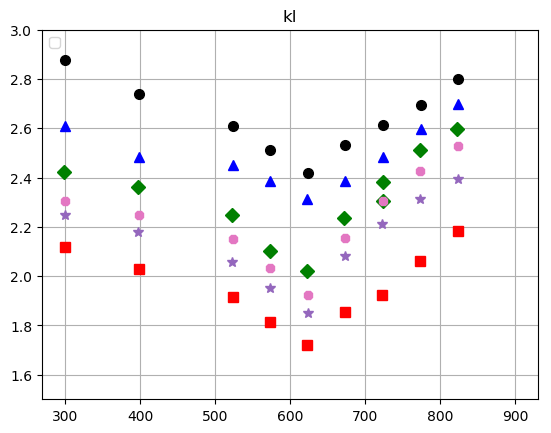

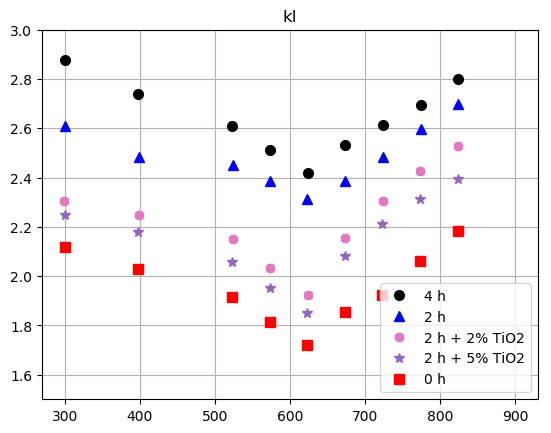

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
No handles with labels found to put in legend.


In [23]:
figure()
title("kl")
plot(Ts,36*klt_SA_A .+kes[:,1,1] .+0.6*kbis[:,1,1],Linestyle="-",color="k")
plot(Ts,34*klt_SA_A .+kes[:,1,1]+0.567 .*kbis[:,1,1],Linestyle="-",color="b")
plot(Ts,28*klt_SA_A .+1.48kes[:,1,1] .+0.57*kbis[:,1,1],Linestyle="-",color="g")
plot(Ts,29*klt_SA_A .+1.5kes[:,1,1] .+0.53*kbis[:,1,1],Linestyle="-.",color="tab:pink")
plot(Ts,27*klt_SA_A .+1.5kes[:,1,1] .+0.53*kbis[:,1,1],Linestyle="-.",color="tab:purple")
plot(Ts,26*klt_SA_A /+1.3kes[:,1,1] .+0.52*kbis[:,1,1],Linestyle="-",color="r")
plot(MgSiSn4hKCT .+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k")
plot(MgSiSn2hKCT .+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b")
plot(MgSiSn05hKCT .+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
plot(MgSiSn2h2TiO2KCT  .+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink")
plot(MgSiSn2h5TiO2KCT .+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple")
plot(MgSiSn0hKCT .+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")
legend(loc="upper left")
ylim(1.5,3.0)
grid()


figure()
title("kl")
plot(Ts,36 .*klt_SA_A .+kes[:,1,1] .+0.6 .*kbis[:,1,1],Linestyle="-",color="k",label="")
plot(Ts,34 .*klt_SA_A .+kes[:,1,1] .+0.567 .*kbis[:,1,1],Linestyle="-",color="b")
#plot(Ts,28*klt_SA_A+1.48kes[:,1,1]+0.57*kbis[:,1,1],Linestyle="-",color="g")
plot(Ts,29 .*klt_SA_A .+1.5kes[:,1,1] .+0.53 .*kbis[:,1,1],Linestyle="-.",color="tab:pink")
plot(Ts,27 .*klt_SA_A .+1.5kes[:,1,1] .+0.53 .*kbis[:,1,1],Linestyle="-.",color="tab:purple")
plot(Ts,26 .*klt_SA_A .+1.3kes[:,1,1] .+0.52 .*kbis[:,1,1],Linestyle="-",color="r")
plot(MgSiSn4hKCT .+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k",label="4 h")
plot(MgSiSn2hKCT .+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b",label="2 h")
#plot(MgSiSn05hKCT+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
plot(MgSiSn2h2TiO2KCT .+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink",label="2 h + 2% TiO2")
plot(MgSiSn2h5TiO2KCT .+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple",label="2 h + 5% TiO2")
plot(MgSiSn0hKCT .+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r",label="0 h")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")

ylim(1.5,3.0)
legend(loc="lower right")
grid()


In [24]:
MgSiSn4hECE=[10,12.4,20.5,35.8,43.2,69.6,82.8,100,110]
MgSiSn2hECE=[3,4.4,8.5,15.8,22.2,55.6,50.8,68,80]
MgSiSn1hECE=[2,4.2,3.7,11.8,22.2,25.6,30.8,48,64]
MgSiSn0hECE=[1.6,1.7,3.8,7.8,12.2,25.6,40.8,68,62]

9-element Array{Float64,1}:
  1.6
  1.7
  3.8
  7.8
 12.2
 25.6
 40.8
 68.0
 62.0

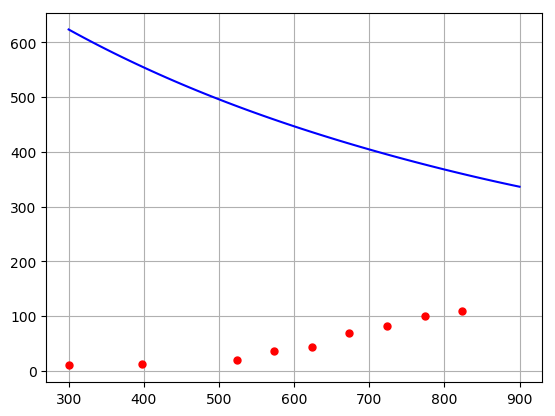

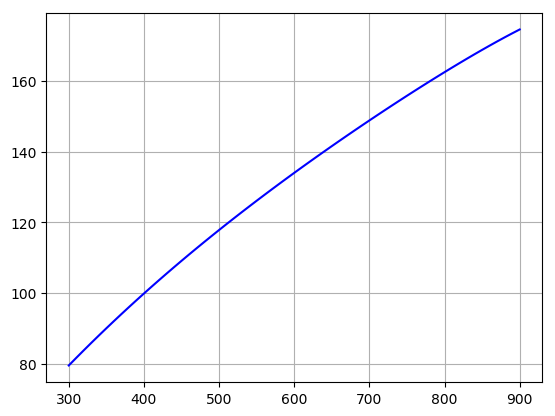

In [25]:

figure()
plot(Ts,sigmas[:,1,1]/100/6^(2/3),linestyle="-",color="b")
#plot(Ts,sigmas[:,2,2]/100/6^(2/3),linestyle="-",color="r")
#plot(Ts,sigmas[:,3,3]/100/6^(2/3),linestyle="-",color="k")
#plot(Ts,sigmas[:,4,4]/100/6^(2/3),linestyle="-",color="g")
plot(MgSiSn4hKCT .+273,MgSiSn4hECE,linestyle="None",marker=".",markersize=10,color="r")
#plot(MgSiSn4hKCT .+273,MgSiSn2hECE,linestyle="None",marker=".",markersize=10,color="k")
#plot(MgSiSn4hKCT .+273,MgSiSn1hECE,linestyle="None",marker=".",markersize=10,color="b")
#plot(MgSiSn4hKCT .+273,MgSiSn0hECE,linestyle="None",marker=".",markersize=10,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Green_EC_E/100,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Blue_EC_E/100,linestyle="None",marker="o",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Pink_EC_E/100,linestyle="None",marker="o",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Black_EC_E/100,linestyle="None",marker="o",markersize=2,color="k")
grid()

figure()
plot(Ts,-seebecks[:,1,1]*1e6,linestyle="-",color="b")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="r")
#plot(Ts,-seebecks[:,3,3]*1e6,linestyle="-",color="k")
#plot(Ts,-seebecks[:,4,4]*1e6,linestyle="-",color="g")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="b")
#plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Green_SC_S,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Blue_SC_S,linestyle="None",marker="x",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Pink_SC_S,linestyle="None",marker="x",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Black_SC_S,linestyle="None",marker="x",markersize=2,color="k")
grid()